# 10 Heatmaps 10 Libraries

I recently watched Jake VanderPlas' amazing PyCon2017 talk on the landscape of [Python Data Visualization](https://youtu.be/FytuB8nFHPQ). That presentation inspired this post. In programming, we often see the same ['Hello World'](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) or Fibonacci style program implemented in multiple programming languages as a comparison. In Jake's presentation, he shows the same scatter plot in several of the libraries he featured. Below, I am following the same formula. I am recreating the same chart, a heatmap about airline flights, in ten different python visualization libraries. 

I am also launching a public github repo [Python-Viz-Compared](https://github.com/AlgorexHealth/python-viz-compared) for these comparison notebooks. Each Jupyter notebook will contain one chart (bar, scatter etc) and then up to 10 different ways of implementing them. But for this post, we are going to start with HeatMaps. 

### the challenge
How easy is it to take a matrix or 2d array and convert it to a heatmap with custom color scaling? 

Jake gave us a good chart sorting out the various approaches of these libraries:

<script async class="speakerdeck-embed" data-slide="35" data-id="a2d86983ff634ac3871ad4e5a308a67b" data-ratio="1.33333333333333" src="//speakerdeck.com/assets/embed.js"></script>

Taking Jake's lead , let's summarize the various quadrants shown here: 

* **Upper Right Purple: Matplotlib Family** These libraries keep matplotlib as a versatile battle-tested back end but provide streamlined domain specific APIs. 
* **Upper Left Turquoise: Browser JS** Build a new API that results in a javascript serialization of a plot for display in a browser. 
* **Lower Right Red: Declarative Visualization** Following a open, cross-platform specification language the data, and visualization can be rendered in any back end by any language. 
* **Everything Else:** This includes a lot of other stuff from platforms that support server-side rendering of streaming data to libraries that leverage GPU platforms specifically. 

I'm going to refer to this system as the VanderPlas taxonomy. So with that overview, let dive in to our challenge. 


*Update: Just after posting I cam across this amazingly written post [A Dramatic Tour through Python’s Data Visualization Landscape](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) and I am sorry I didn't have the creativity to equal it*


In [1]:
from IPython.core.display import HTML
import pandas as pd
import numpy as np


## Data for our Heatmap

The heatmap will be making is actually one of the [examples in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html). It comprises monthly totals for airline passengers from 1949 to 1960 on a specific route. It is adapted from the R package `airpassengers`.  

We will read it into pandas and use it for all charts going forward.

In [2]:
flights_raw = pd.read_csv('data/flights.csv')
flights_raw["month"] = pd.Categorical(flights_raw["month"], flights_raw.month.unique())
flights_raw.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


To support the heatmap, we will pivot the dataset to put years on the x axis and months on Y axis. This will create a matrix (called `flight_matrix` below) that absent any coloring represents our heatmap. About half of the libraries listed here ask for a matrix input when processing the data for a heatmap.  

In [3]:
flight_matrix = flights_raw.pivot("month", "year", "passengers")
flight_matrix

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


The other half want something closer to our original array. We will refer to that as `flight_rows`. 

In [4]:
flight_rows = flights_raw

## Heatmap 1: MatplotLib

First up [matplotlib](https://matplotlib.org), the most venerable python visualization library with support to export and use many many rendering types (png, pdf, svg etc).



Text(0,0.5,'Month')

<Figure size 432x288 with 0 Axes>

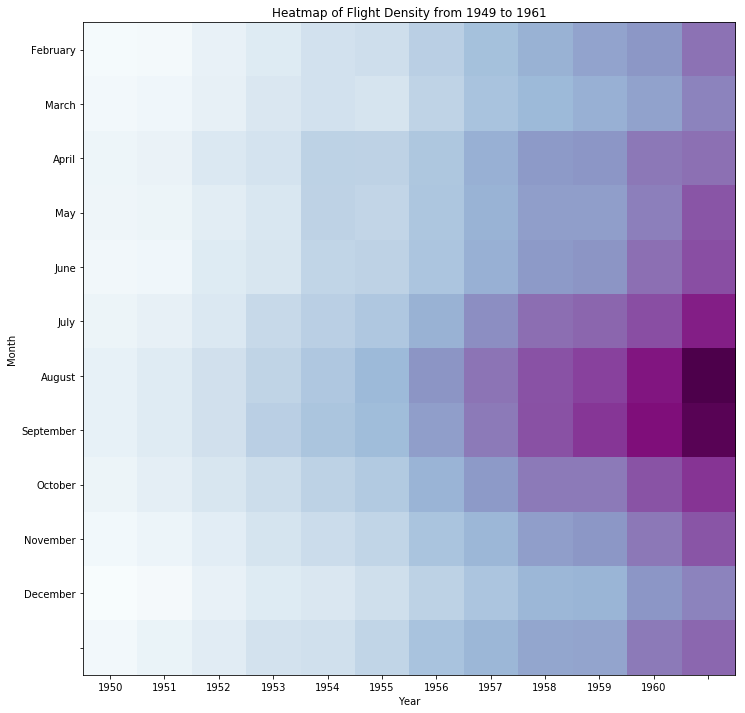

In [5]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(12,12))
heatplot = ax.imshow(flight_matrix, cmap='BuPu')
ax.set_xticklabels(flight_matrix.columns)
ax.set_yticklabels(flight_matrix.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Heatmap of Flight Density from 1949 to 1961")
ax.set_xlabel('Year')
ax.set_ylabel('Month')


While matplotlib makes heat maps really easy with `imshow`, I find it tricky to have a mental model of the figure, subplot, and axes. The subplot is critical here in order ensure you can rename the axes labels. Then a whole new module needs to be imported to set the ticker correctly. 

But at the end, every element is here and it will be the standard we measure against. Clean color scale mapped to the passenger volume, titles, axis labels all consistently shown.

credit: *https://stackoverflow.com/questions/32236046/add-a-legend-to-my-heatmap-plot*

## Heatmap 2 Seaborn

[Seaborn](https://seaborn.pydata.org/introduction.html) is a streamlining of matplotlib's API to make it more applicable to statistical applications. Seaborn's API makes you think about the best way to compare univariate or bivariate data sets and then has clear and concise syntax to get the charts needed to immediately compare your variables. 

Text(0.5,1,'Heatmap of Flight Density from 1949 to 1961')

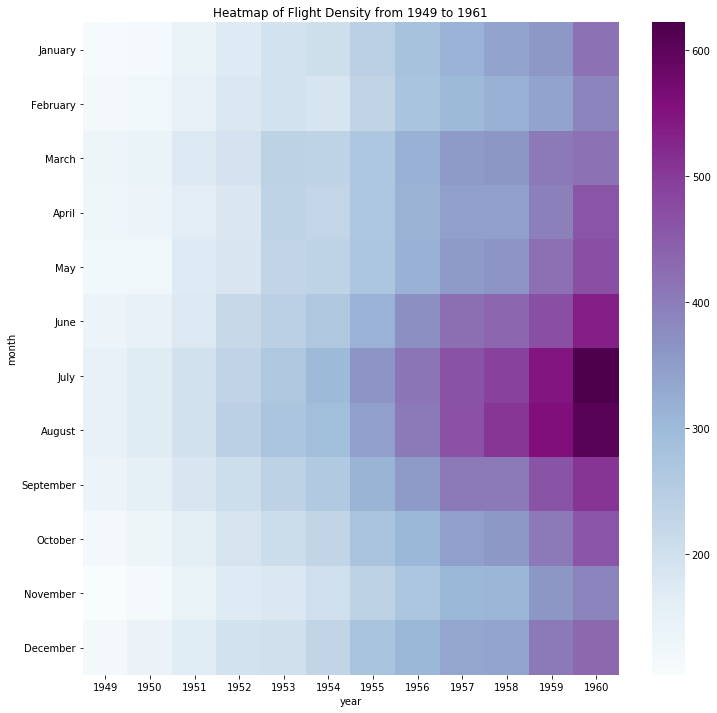

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(flight_matrix, cmap='BuPu')
r.set_title("Heatmap of Flight Density from 1949 to 1961")


Remember, seaborn is implemented on top of matplotlib. So, you can use the same conventions in matplotlib to manipulate the chart. So, I used matplotlib's figure to define the size of the chart I wanted and then Seaborn took care of the rest. Giving us a perfect heatmap with the added color bar to show the scaling. 

## Heatmap 3 PlotNine (ggplot2):

[plotnine](https://github.com/has2k1/plotnine) is the python implementation of R's most dominant visualization library [ggplot2](http://had.co.nz/ggplot2/). Like matplotlib in python, ggplot2 is the default visualization for R with support for all types of outputs. 

Plotnine is a bit of magic especially if you are really good at ggplot (I am not) and you are willing to import the entire namespace with `import *` so that you don't have to prefix every element. Then it faithfully recreates the ggplot2 syntax. 

In [7]:
from plotnine import * 

fig = plt.figure()


ggplot(flight_rows, aes('year', 'month')) + geom_tile(aes(fill='passengers'))\
    + scale_fill_gradientn(colors=['#9ebcda','#8c6bb1','#88419d','#6e016b']) \
    + ggtitle("Heatmap of Flight Density from 1949 to 1961")

ModuleNotFoundError: No module named 'plotnine'

As I said above, if you are coming from R to python, you will love this library which faithfully recreates the ggplot syntax. The team at Plotnine has said they are looking to implement the entire ["Grammar of Graphics"](ttp://dx.doi.org/10.1198/jcgs.2009.07098) using matplotlib as the backend to render the images. 

credit: *https://www.r-bloggers.com/how-to-make-a-simple-heatmap-in-ggplot2/* 

## Heatmap 4: BqPlot

Based on the VanderPlas taxonomy, the next four libraries are from a different core set of assumptions. These all use a python API to customize a javascript client-side framework that renders the data and figure in the browser. The advantages to this approach are that the figures have a modern look and can include rich browser interactions such as zooming, selection, and filtering. 

I had not used bqplot prior to this exercise and like ggplot, plotnine, it has a syntax inspired by grammar of graphics. Frankly, the heatmap example was so easy, I can't claim to have learned very much 

In [ ]:
import bqplot
from ipywidgets import Layout
from ipywidgets import widgets
from IPython.display import display
#Make sure you enable the jupyter extension


x = flight_matrix.index
y = flight_matrix.columns


x_sc, y_sc, col_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale(), bqplot.ColorScale(scheme='BuPu')
ax_x = bqplot.Axis(scale=x_sc, label='Years')
ax_y = bqplot.Axis(scale=y_sc, orientation='vertical', label='Months')
ax_c = bqplot.ColorAxis(scale=col_sc)

heat = bqplot.GridHeatMap(color=flight_matrix,
               scales={'row': x_sc, 'column': y_sc, 'color': col_sc}, stroke='white', row=y.tolist(), column=x.tolist())

fig = bqplot.Figure(marks=[heat], axes=[ax_x, ax_y, ax_c],
             title="Heatmap of Flight Density from 1949 to 1961", layout=Layout(width='650px', height='650px'))
fig


<s>Where are my tick marks? I have no idea. I think because i am using a linear scaler here, it is dismissing the names of the years and months that should appear on the Y and X axes. I looked at the raw code for the Axes class and it appears to only support numerical and date axes. Someone can speak up on this issue if they want to correct me. Also, is it just me or are the colors wrong? </s>

Got a great comment from [Sylvain Corlay](https://twitter.com/SylvainCorlay/status/967458628373483520), the author of bqplot on how to add the tick and label names. It was really obvious and clearly shown in the example. Basically, there are column and row arguments that allow you pass the label names so that they appear. 

## Heatmap 5: plotly

[plotly](https://plot.ly) is fantastic plotting library that combines a free, open-source version and also a paid version that offers some server assisted features. Plotly has amazing cross-platform support for python, R, and Javascript. It has also has great documentation and example library. 

You will need to register for a free plotly account to use this one. You will register it  from the command line by running the following:

```
import plotly
plotly.tools.set_credentials_file(username='DemoAccount', api_key='i8i8i8i8i8')
``



In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go



colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]

heatmap = go.Heatmap(z=flight_matrix.as_matrix(), x=flight_matrix.columns, y=flight_matrix.index, colorscale=colorscale)
data = [heatmap]
py.iplot(data, filename='basic-heatmap')



Plotly as you can see was very succinct and they added interactivity automatically. The online support also is really great. By visiting the links at plotly, you can can edit the chart in a sort of gui on their website and even regenerate the code used to create the plot. This built up a great community of chart visualizations. 

## Heatmap 6: cufflinks

This is sort of a trick. Cufflinks is plotly just with a different api designed to be run directly from a pandas dataframe. This makes the data inputs easier set-up and use in the charts. 



In [ ]:
import cufflinks as cf

# Correct datatypes cufflinks does not support CategoryType so we make them strings and rebuild the dataframe. 
df_flights = pd.DataFrame(data=flight_matrix.as_matrix(), index=flight_matrix.index.astype('str'), columns=flight_matrix.columns)

df_flights.iplot(kind='heatmap', colorscale='bupu' )

Yea that was easy, perhaps too easy since the plot was arranged vertically instead of left to right. This is the sixth heatmap of our group and the only one out of ten to derive the aspect of the chart in this way. Still, I love the combination of plotly and cufflinks. The embedded tools to save, as PNG, zoom and select are really powerful. If you can accept having a reliance on plotly's servers, this library is an extremely concise and easy.

## Heatmap 7: Bokeh

[Bokeh](https://bokeh.pydata.org/en/latest/) is another combination javascript client library and python API. Developed and maintained by Anaconda (formerly Continuum Analytics). Bokeh has a rich grammar elements not only the chart elements but also for interactions and dashboarding. Bokeh has two aspects that make it unique: First, Bokeh has shared data structures that sync with the server and can then update multiple linked plots in rich dashboards. Second, bokeh is being developed as a backend for newer libraries such as holoviews (coming up in plot 8). 



In [ ]:
from bokeh.io import show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
from bokeh.plotting import figure
from bokeh.palettes import BuPu
#import holoviews as hv #There is a reason we have to do this here but its not important. Holoviews is the next library
#hv.extension('bokeh')


output_notebook()

# Bokeh doesn't have its own gradient color maps supported but you can easily use on from matplotlib.
colormap =cm.get_cmap("BuPu")
bokehpalette = [mpl.colors.rgb2hex(m) for m in colormap(np.arange(colormap.N))]


#this mapper is what transposes a numerical value to a color. 
mapper = LinearColorMapper(palette=bokehpalette, low=flight_matrix.min().min(), high=flight_matrix.max().max())
x_range = FactorRange(factors=flight_matrix.columns.astype('str'))


years = list(flight_matrix.columns.astype('str'))
months = list(flight_matrix.index)

flight_rows['year'] = flight_rows.year.astype('str')

#ColumnDataSource is bokeh fancy shared datasource. Not applicable here but it would generally allow the sharing of one data source
#with multiple charts. 
source = ColumnDataSource(flight_rows)

z = figure(title="Heatmap of Flight Density from 1949 to 1961", x_range=years, y_range=months
           , toolbar_location='below', toolbar_sticky=False)

z.rect(x='year', y='month', width=1, height=1, source=source
       , fill_color={'field': 'passengers', 'transform': mapper}, line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=8),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
z.add_layout(color_bar, 'right')
z.xaxis.axis_label = 'Years'
z.yaxis.axis_label = 'Months'


show(z)


As you can see, Bokeh is one of the more verbose implementations of this chart so far. But, I will admit I am homer for Bokeh. That verbosity reveals an underlying complexity where you can literally map everything. What makes it verbose is the manipulation of the properties (labels, colors, dataranges) but those properties follow a logical grammar and  are easy to find. The label to identify the x-axis is simply the `xaxis.axis_label`. Likewise, the font size of the title is simply `title.text_font_size`.

The second major advantage of Bokeh is it's unique way of linking the data between plots. Notice the `ColumnDataSource`above. Say if we wanted to add a table or line graph from the same underlying dataframe, Bokeh would automatically recognize that the graphs shared the same data source and update them together. The charts could be updated from a widget like a dropdown box or radio button. In this way, Bokeh is works like [Shiny](https://shiny.rstudio.com) from the R ecosystem. Some simple jinja templates and Bokeh server functionality allow the construction of rich visualizations and web apps. 

## Heatmap 9: Holoviews 

So if Bokeh is too verbose with too many attributes to manage, take heart that there is a new project from the same team at Anaconda that uses bokeh as a backend but gives the advantage of a cleaner API that infers the correct chart based on the input data. [Holoviews](http://holoviews.org) has the very ambitious goal of "letting data visualize itself." So for holoviews, the aim of the designers is to have you state what you want to learn and pass in the data and then the library will infer the various variables and create the chart. In fact, bokeh is not even the only backend supported. The team has a backend interface to matplotlib and also to plotly, though these do not have feature parity with the bokeh backend yet. 

If you thought bokeh was too verbose, Holoviews is why. Anaconda is positioning bokeh as a backend for visualization while the ease of use for the analyst/data scientist gets developed in holoviews. 

In [ ]:
import holoviews as hv
hv.extension('bokeh')

In [ ]:
%%opts HeatMap (cmap='BuPu')
%%output size=250



hv.HeatMap(flight_rows, label="Heatmap of Flight Density from 1949 to 1961", )

One line of code is all that took. Very cool! Let me explain a little bit about what happened. Holoviews seperates the style from the substance. When plotting with holoviews, the various plot types HeatMap, Scatter etc look for a combination of value dimensions (*vdims*) and key dimensions (*kdims*). So our data contained in `flight_rows`, has two *kdims* (month, year) and one *vdim* (passengers). So when we invoke `hv.Heatmap` it can immediatly infer the correct display. The style is all handled seperatly through declared options which can be invoked globally through cell or line magics in Jupyter Notebooks. 



## Heatmap 9: Altair

Altair is one of the newer libraries on the block. It was started by a team incluing Jake VanderPlas and is being supported by the [Interactive Data Lab @ the University of Washington](https://idl.cs.washington.edu). Altair is part of an ecosystem surronding [Vega](https://vega.github.io) a JSON specification format that renders using the D3 visualization library. Given the power and amazing influence of [D3](https://github.com/d3/d3/wiki/Gallery), Vega, and Altair (they are both stars in the summer triangle) promise a much easier interface and implementation of visualizations. 

As I mentioned in Heatmap 4 sometimes the [tutorials](https://altair-viz.github.io/recipes.html#heatmaps) are so simple, it can be ahr judge the library. That is absolutly true of Altair, which was really easy to figure out. 




In [ ]:
from altair import Row, Column, Chart, Text, Scale, Color

Chart(flight_rows).mark_text(
               applyColorToBackground=True
           ).encode(
               row=Row('month', sort='none'),
               column='year',
               text=Text(value=' '),
               color=Color('passengers', scale=Scale(type='linear', range=['#bfd3e6', '#6e016b']))
           ).configure_scale(
               textBandWidth=55,
               bandSize=60
           )

#"scale": {"scheme": "bluepurple"} doesn't work

It's very important to know that the specification being written is converted immediatly to JSON. You can view that JSON using the "view source" or Open In vega Editor button which automatically links to a nice online tool imperatively change ths JSON and view result. 

Becasue this will end up as JSON, an attribute getting a single value can be set directly, such as `column='year'`, but when more arguments are needed, you have to call it like a class method. Thus, `color=Color('passengers', color=Color('passengers', scale=Scale(type='linear', range=['#bfd3e6', '#6e016b']))` gets transformed into the following JSON. 

```
"color": {
      "field": "passengers",
      "scale": {
        "range": [
          "#bfd3e6",
          "#6e016b"
        ],
        "type": "linear"
      }
```

So the basic Altair/Vega-Lite syntax is as follows:

1. Create a chart that invokes the data
2. As for "text" marks to be drawn on the chart. We then ask that text be drawn with background color. 
3. Encode the data (from #1) onto the text marks. Encodnings accept expressions so rather than encoding 'passengers' onto the text property, we instead encode the value '  ' to ensure the actual counts do not appear. 

The only problem with this chart is that the color scale is not the full `BuPu` brewer scale rather it is simply a scale between the two colors as written. It should be possible to have a Scale written against vega's coniuous "bluepurple" color scheme which matches `BuPu` palette we have used so far. However, it [does not appear](https://github.com/altair-viz/altair/blob/master/altair/notebooks/10-Heatmaps.ipynb) that altair does not support passing those colormaps to scales yet. (I believe that will come when upgraded to vega-lite 2.0). 

## Heatmap 10: Lightning Viz

Referring back to the VanderPlas taxonomy, [Lightnig Viz](http://lightning-viz.org) is in the everything else category. Like plotly, it is cross-platform with a javascript client api for R, Scala, and javascript. Also, it relies on communication with a server that handles much of the difficult rendering. However, it is released under MIT license so its completly free to use and improve. When you develop in a notebook environment like this post, you can choose to use a public lightning server maintained by the development team or you can one click deploy a server via heroku, docker or other service. 

In [ ]:
from lightning import Lightning
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org') #this is the server we are going to use. 

In [ ]:
lgn.matrix(flight_matrix, colormap='BuPu', row_labels=list(flight_matrix.index.values), column_labels=list(flight_matrix.columns.values), width=1000, description="Heatmap of Flight Density from 1949 to 1961")

And we have a new winner for the easiest implementation of our chart. Lightning really did perform this task in one line of code. We could nitpick that there is no way to add a title but really this was impressive. The server also adds a bunch of functionality that would otherwise not be availble (unles you are using plotly). Each chart gets its own unique URL so they can be shared and passed through an organization. The server even includes a mini-wizard for users to build their own visualizations [without code](http://lightning-viz.org/usage/#client). The server also makes these visualizations really fast because it does some magic to customize the javascript and cache results. This is especially helpful if you are going to stream in data requiring constant updates. 


## Wrapping Up

Did you make it this far hopinh I would reccomend one of these libraries for all your use cases? I can't do that unfortunatly. But I can give you a little guide for how to pick.

* Do you need publication worthy images for a journal or PDF? Pick matplotlib, seaborn or any of the libraries that use an matplotlib backend. This is because matplotlib has the most numerous outputs to render the chart as an image and is natively supported by nbconvert for jupyter notebooks. I should say that altair and bokeh are making strides in this area. But they rely on massive external libraries (often written in Node) to consistently generate the outputs. 

* Do you plan on building a large set of dashboards or custom web-application with these charts? Then I would consider any of bokeh, plot.ly, lightning, or altair. They are built for browsers and and support adding interactivity through signaling and widgets. Lightning especially will help speed up the delivery of these charts and the caching/sharing of the results will ease your client-side loads. 

* Are you a statistician data scientist who just wants to explore data? I'd consider holoviews or seaborn whose APIs focus on bivariate, univariate tests based on inbound data. The styling may be dense and tricky to navigate but styling isn't your chief concern. 

Feel free to leave comments below or reach out to any of us at [Algorex Health](mailto:info@algorexhealth.com).
